In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("parkinson_data.csv")

In [3]:
df.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   
5      0.06985  0.01222  21.378  0.415564  0.825069 -4.242867  0.299111   
6      0.02337  0.00607  24.886  0.596040  0.764112 -5.634322  0.257682   
7      0.02487  0.00344  26.892  0.637420  0.763262 -6.167603  0.183721   
8      0.03218  0.01070  21.812  0.615551  0.773587 -5.498678  0.327769   
9      0.04324  0.01022  21.862  0.547037  0.798463 -5.011879  0.325996   

         D2       PPE  status  
0  2.301442  0.284654       1  
1  2.486855  0.368674       1  
2  2.342259  0.332634       1  
3  2.405554  0.368975       1  
4  2.332180  0.410335       1  
5  2.187560  0.357775       1  
6  1.854785  0.211756       1  
7  2.064693  0.163755       1  
8  2.322511  0.231571       1  
9  2.432792  0.271362       1  

[10 rows x 24 columns]

In [4]:
df.tail(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
185  phon_R01_S49_3      116.286       177.291        96.983         0.00314   
186  phon_R01_S49_4      116.556       592.030        86.228         0.00496   
187  phon_R01_S49_5      116.342       581.289        94.246         0.00267   
188  phon_R01_S49_6      114.563       119.167        86.647         0.00327   
189  phon_R01_S50_1      201.774       262.707        78.228         0.00694   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
185           0.00003   0.00134   0.00192     0.00403       0.01564  ...   
186           0.00004   0.00254   0.00263     0.00762       0.01660  ...   
187           0.00002   0.00115   0.00148     0.00345       0.01300  ...   
188           0.00003   0.00146   0.00184     0.00439       0.01185  ...   
189           0.00003   0.00412   0.00396     0.01235       0.02574  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
185      0.02001  0.00737  24.199  0.598515  0.654331 -5.592584  0.133917   
186      0.02460  0.01397  23.958  0.566424  0.667654 -6.431119  0.153310   
187      0.01892  0.00680  25.023  0.528485  0.663884 -6.359018  0.116636   
188      0.01672  0.00703  24.775  0.555303  0.659132 -6.710219  0.149694   
189      0.04363  0.04441  19.368  0.508479  0.683761 -6.934474  0.159890   
190      0.07008  0.02764  19.517  0.448439  0.657899 -6.538586  0.121952   
191      0.04812  0.01810  19.147  0.431674  0.683244 -6.195325  0.129303   
192      0.03804  0.10715  17.883  0.407567  0.655683 -6.787197  0.158453   
193      0.03794  0.07223  19.020  0.451221  0.643956 -6.744577  0.207454   
194      0.03078  0.04398  21.209  0.462803  0.664357 -5.724056  0.190667   

           D2       PPE  status  
185  2.058658  0.214346       0  
186  2.161936  0.120605       0  
187  2.152083  0.138868       0  
188  1.913990  0.121777       0  
189  2.316346  0.112838       0  
190  2.657476  0.133050       0  
191  2.784312  0.168895       0  
192  2.679772  0.131728       0  
193  2.138608  0.123306       0  
194  2.555477  0.148569       0  

[10 rows x 24 columns]

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [6]:
df.shape

(195, 24)

In [7]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR        RPDE  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.498536   
std            0.194877  ...     0.030459    0.040418    4.425764    0.103942   
min            0.085000  ...     0.013640    0.000650    8.441000    0.256570   
25%            0.148500  ...     0.024735    0.005925   19.198000    0.421306   
50%            0.221000  ...     0.038360    0.011660   22.085000    0.495954   
75%            0.350000  ...     0.060795    0.025640   25.075500    0.587562   
max            1.302000  ...     0.169420    0.314820   33.047000    0.685151   

              DFA     spread1     spread2          D2         PPE      status  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.718099   -5.684397    0.226510    2.381826    0.206552    0.753846  
std      0.055336    1.090208    0.083406    0.382799    0.090119    0.431878  
min      0.574282   -7.964984    0.006274    1.423287    0.044539    0.000000  
25%      0.674758   -6.450096    0.174351    2.099125    0.137451    1.000000  
50%      0.722254   -5.720868    0.218885    2.361532    0.194052    1.000000  
75%      0.761881   -5.046192    0.279234    2.636456    0.252980    1.000000  
max      0.825288   -2.434031    0.450493    3.671155    0.527367    1.000000  

[8 rows x 23 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
df_new = df.drop("name",axis=1)

In [10]:
duplicate = df.duplicated()
df[duplicate].sum()

name                  0
MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
status                0
dtype: object

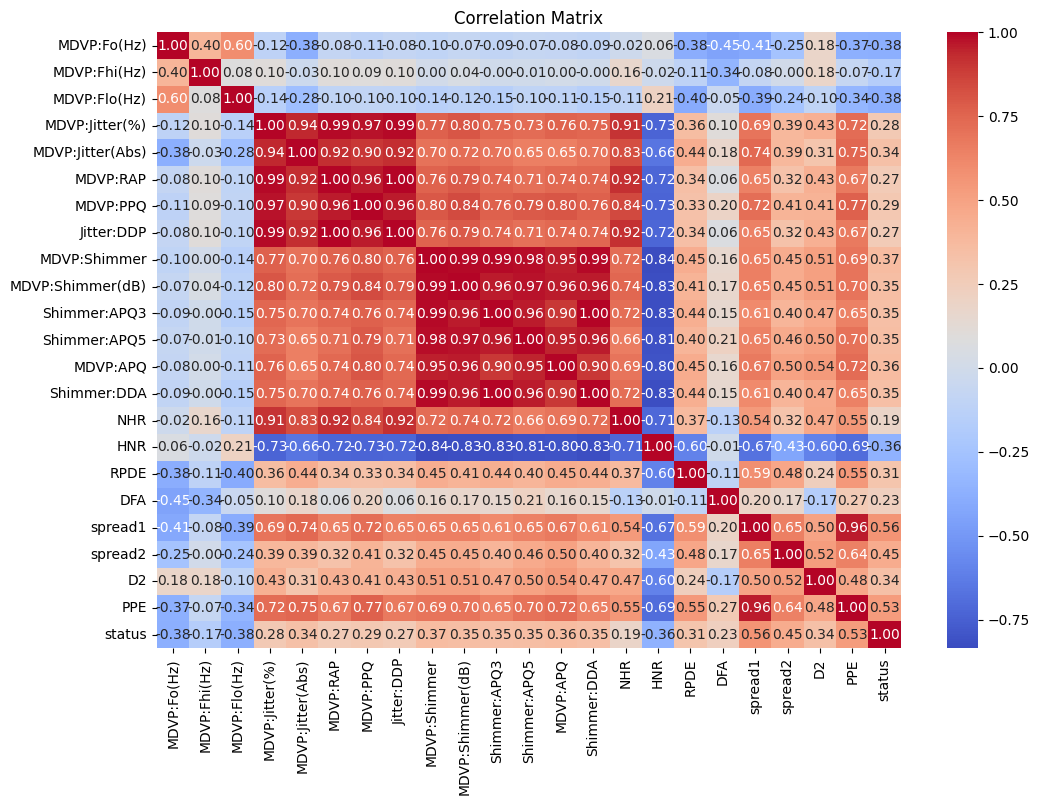

In [11]:
#checking the relation of different column with one another using correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

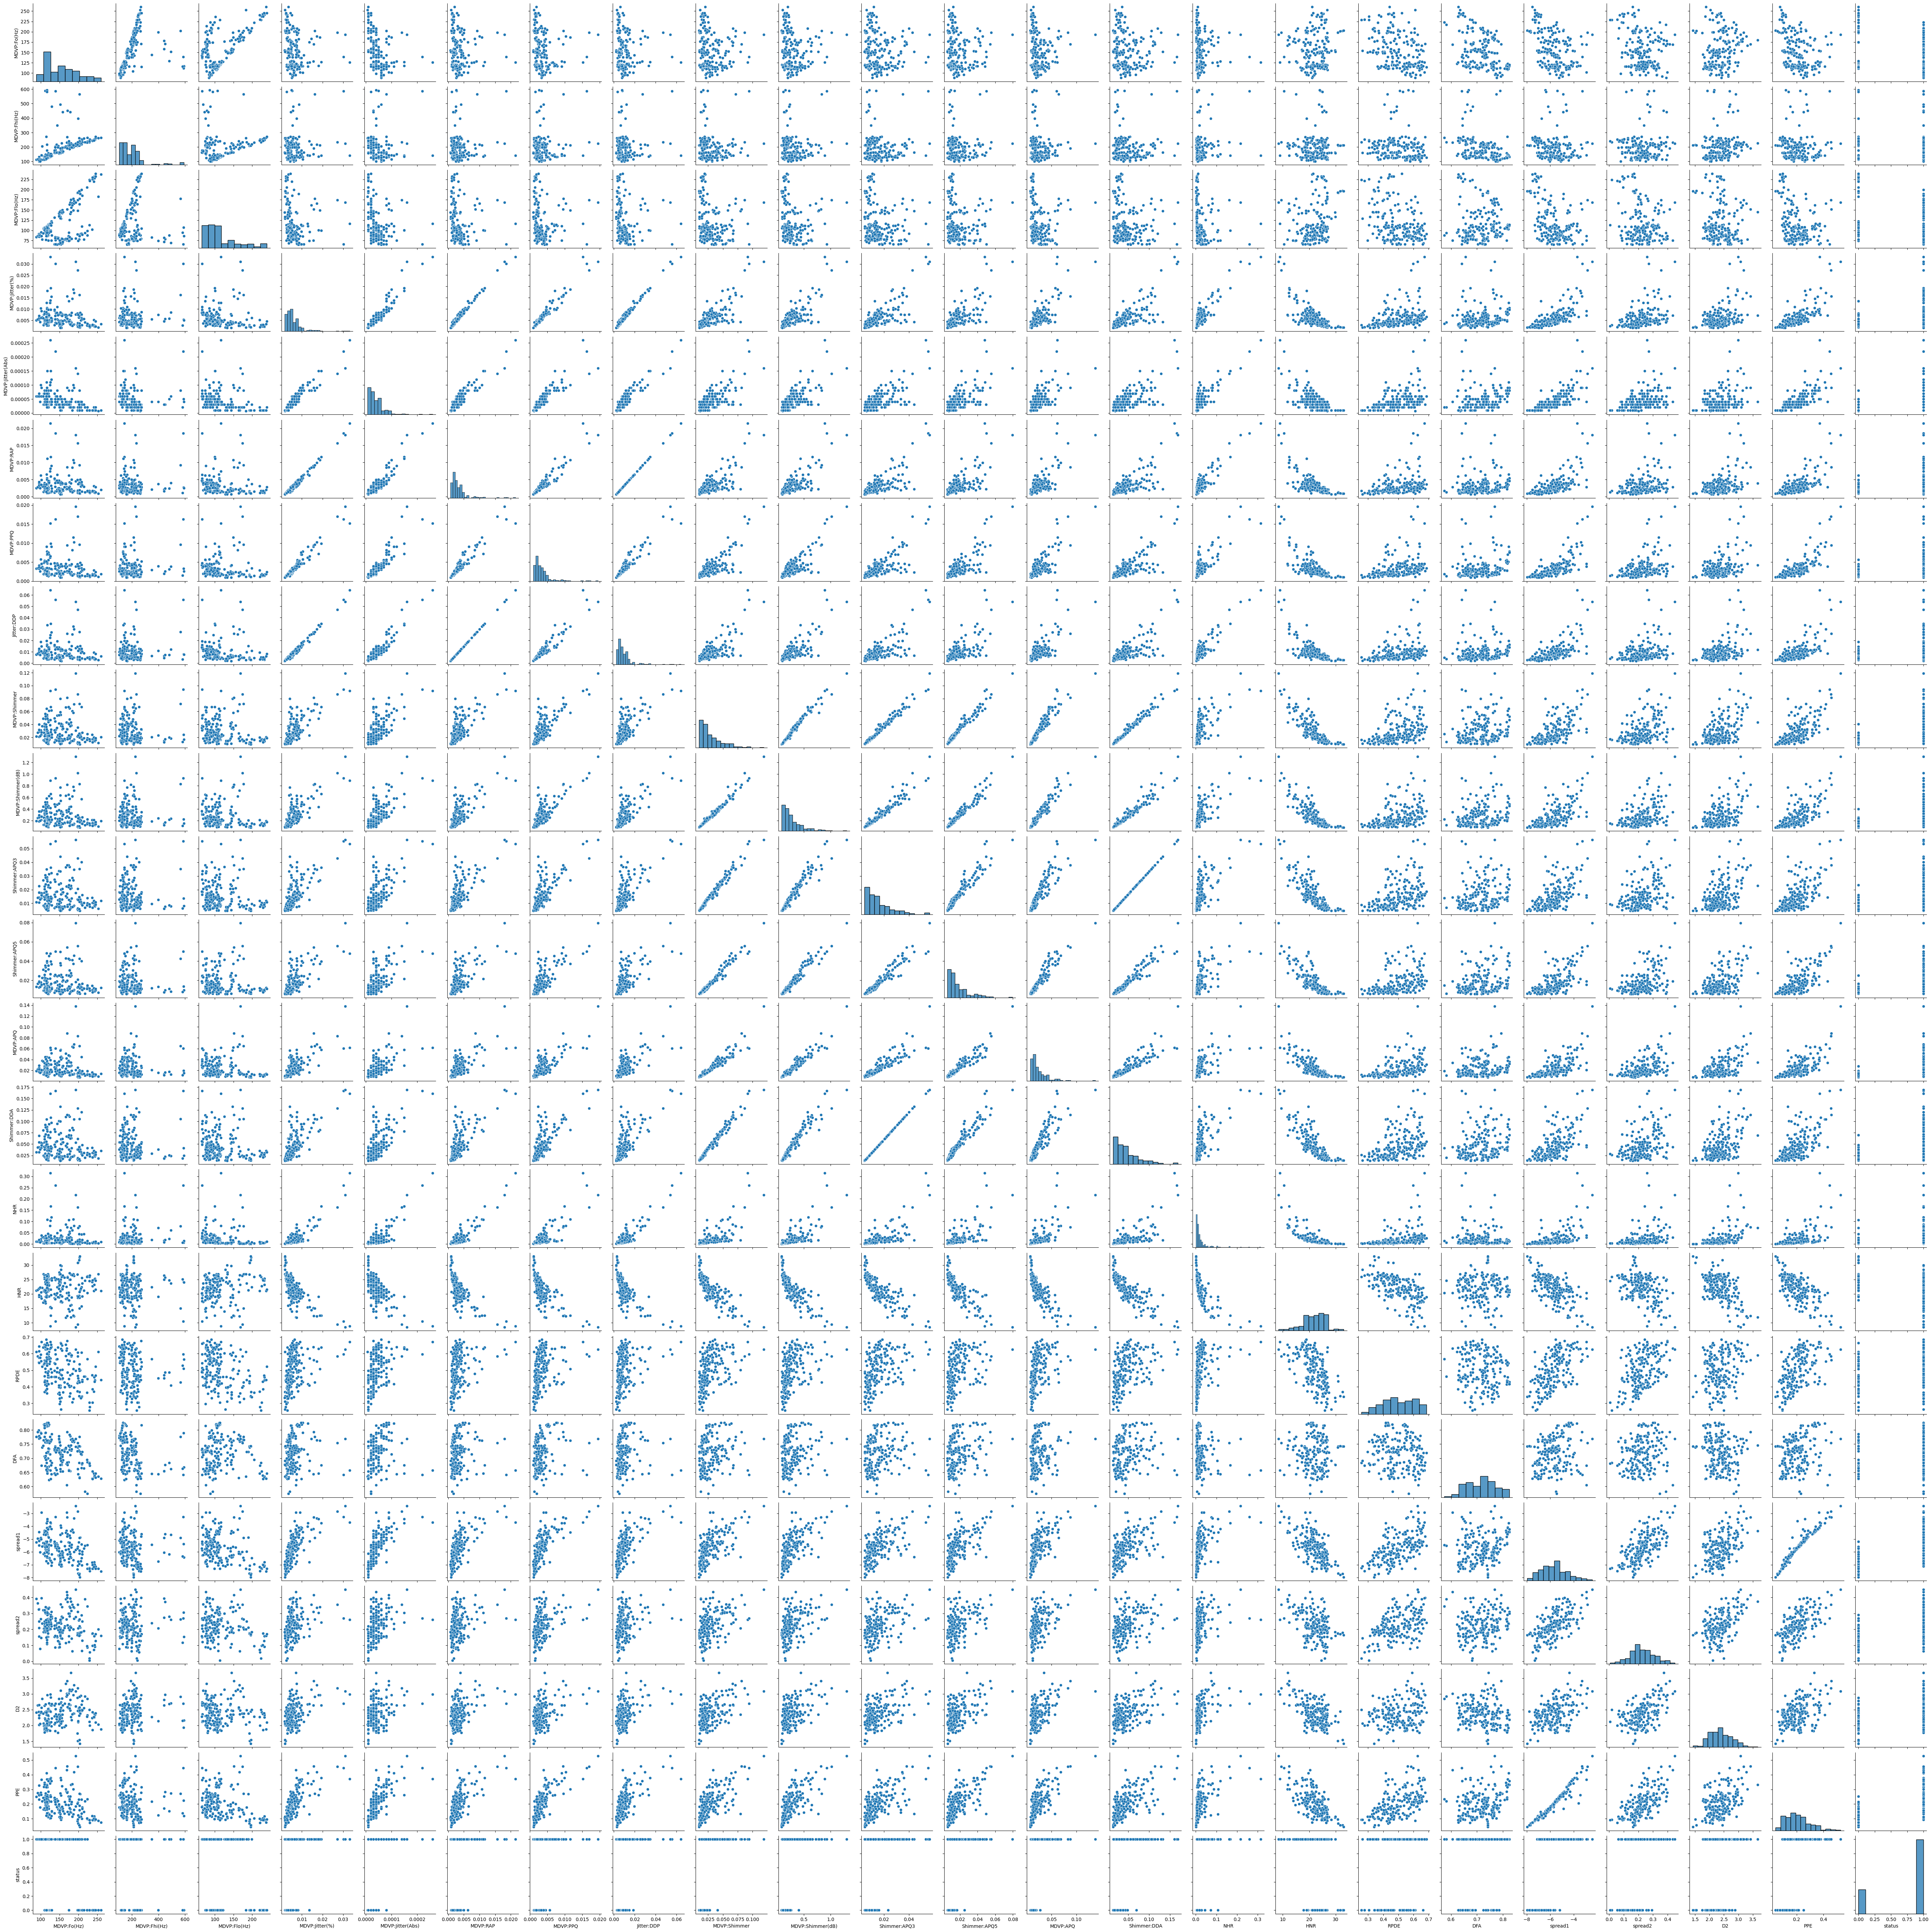

In [12]:
sns.pairplot(df,kind="scatter")

In [13]:
# independent and dependent variable
X = df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [14]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [15]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_knn = KNeighborsClassifier(n_neighbors=3)
model_dt = DecisionTreeClassifier()
model_sc = SVC()

In [16]:
parameter_lr = {
    "penalty":['l2'],
          'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],
             'max_iter':[100,200,300]
}
parameter_rf ={
    "n_estimators":[50,100,150,200],
    "max_depth":[5,8,10],
    "min_samples_split":[2,4,6,8,10],
    "min_samples_leaf":[2,4,5],
    "max_features":['auto', 'sqrt', 'log2']
}

parameter_sc ={
    "C":[0.1,1,10],
    "kernel":["linear","rbf"],
    "gamma":["scale","auto"],
    "degree":[3,5]
}

parameter_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}
parameter_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

parameter_dt ={
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']
}


In [17]:
classifier_regressor_lr=GridSearchCV(model_lr,param_grid=parameter_lr,scoring="accuracy",cv=5)
classifier_regressor_rf=GridSearchCV(model_rf,param_grid=parameter_rf,scoring="accuracy",cv=5)
classifier_regressor_xgb=GridSearchCV(model_xgb,param_grid=parameter_xgb,scoring="accuracy",cv=5)
classifier_regressor_dt=GridSearchCV(model_dt,param_grid=parameter_dt,scoring="accuracy",cv=5)
classifier_regressor_knn=GridSearchCV(model_knn,param_grid=parameter_knn,scoring="accuracy",cv=5)
classifier_regressor_sc=GridSearchCV(model_sc,param_grid=parameter_sc,scoring="accuracy",cv=5)

In [18]:
classifier_regressor_lr.fit(X_train,y_train)
classifier_regressor_sc.fit(X_train,y_train)
classifier_regressor_dt.fit(X_train,y_train)
classifier_regressor_knn.fit(X_train,y_train)
classifier_regressor_xgb.fit(X_train,y_train)
classifier_regressor_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [19]:
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Logistic Regression:", classifier_regressor_lr.best_params_)
print("Best Score for Logistic Regression:", classifier_regressor_lr.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for RandomForestClassifer:", classifier_regressor_rf.best_params_)
print("Best Score for RandomForestClassifier:", classifier_regressor_rf.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for SVC:", classifier_regressor_sc.best_params_)
print("Best Score for SVC:", classifier_regressor_sc.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Xgboost:", classifier_regressor_xgb.best_params_)
print("Best Score for Xgboost:", classifier_regressor_xgb.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Knearestneighbour:", classifier_regressor_knn.best_params_)
print("Best Score for  Knearestneighbour:", classifier_regressor_knn.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Decisiontreeclassifier:", classifier_regressor_dt.best_params_)
print("Best Score for Decisiontreeclassifier:", classifier_regressor_dt.best_score_)

Best Parameters for Logistic Regression: {'C': 2, 'max_iter': 300, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.8563218390804597
Best Parameters for RandomForestClassifer: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Best Score for RandomForestClassifier: 0.9448275862068967
Best Parameters for SVC: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVC: 0.8563218390804597
Best Parameters for Xgboost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.7}
Best Score for Xgboost: 0.9310344827586207
Best Parameters for Knearestneighbour: {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}
Best Score for  Knearestneighbour: 0.883448275862069
Best Parameters for Decisiontreeclassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score for Decisiontreeclassifier: 0.917471

In [20]:
y_pred_lr = classifier_regressor_lr.predict(X_test)
y_pred_rf = classifier_regressor_rf.predict(X_test)
y_pred_sc = classifier_regressor_sc.predict(X_test)
y_pred_knn = classifier_regressor_knn.predict(X_test)
y_pred_dt = classifier_regressor_dt.predict(X_test)
y_pred_xgb = classifier_regressor_xgb.predict(X_test)

In [21]:
score_lr = accuracy_score(y_pred_lr,y_test)
print("score of logistic regression: ",score_lr)
score_knn = accuracy_score(y_pred_knn,y_test)
print("score of kNearestNeigbour Classifierscore_knn:",score_knn)
score_sc = accuracy_score(y_pred_sc,y_test)
print("score of Support Vector Classfier:",score_sc)
score_dt = accuracy_score(y_pred_dt,y_test)
print("score of Decision Tree Classifier:",score_dt)
score_rf = accuracy_score(y_pred_rf,y_test)
print("score of RandomForest Classifier:",score_rf)
score_xgb = accuracy_score(y_pred_xgb,y_test)
print("score of XGBoost Classifier:",score_xgb)

score of logistic regression:  0.8775510204081632
score of kNearestNeigbour Classifierscore_knn: 0.7959183673469388
score of Support Vector Classfier: 0.8775510204081632
score of Decision Tree Classifier: 0.8163265306122449
score of RandomForest Classifier: 0.9183673469387755
score of XGBoost Classifier: 0.9387755102040817


In [22]:
#classification_report 
print("classification report of logistic regression")
print(classification_report(y_pred_lr,y_test))
print("Classification Report of Support Vector Classfier")
print(classification_report(y_pred_sc,y_test))
print("Classification Report of K NearestNeighbour Classifier")
print(classification_report(y_pred_knn,y_test))
print("Classification Report of XGBoost Classifier")
print(classification_report(y_pred_xgb,y_test))
print("Classification Report of RandomForest Classifier")
print(classification_report(y_pred_rf,y_test))
print("Classfication Report of Decision Tree Classifier")
print(classification_report(y_pred_dt,y_test))

classification report of logistic regression
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.97      0.88      0.93        42

    accuracy                           0.88        49
   macro avg       0.76      0.87      0.80        49
weighted avg       0.91      0.88      0.89        49

Classification Report of Support Vector Classfier
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.97      0.88      0.93        42

    accuracy                           0.88        49
   macro avg       0.76      0.87      0.80        49
weighted avg       0.91      0.88      0.89        49

Classification Report of K NearestNeighbour Classifier
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.87      0.87      0.87        38

    accuracy                    

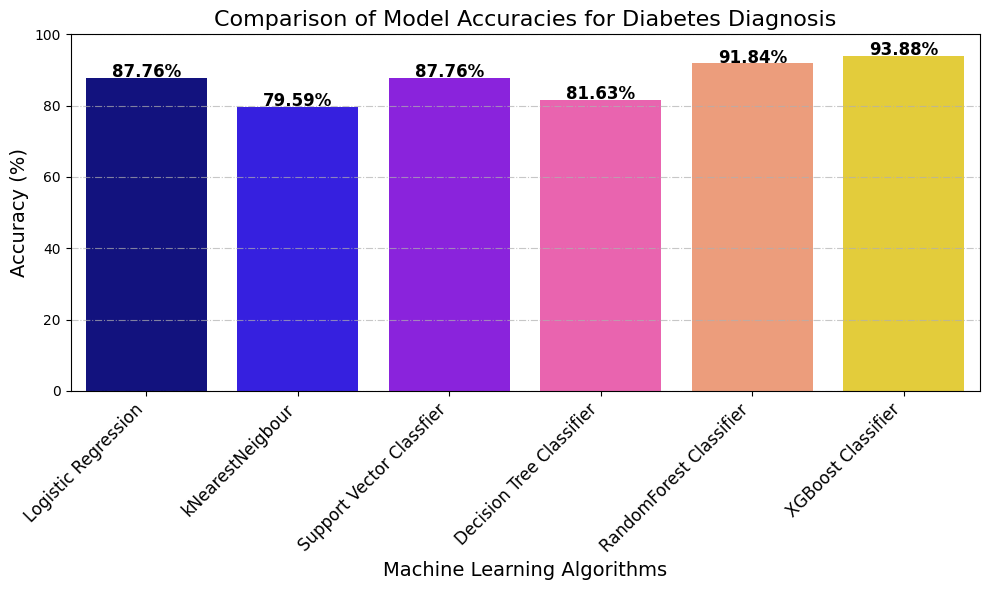

In [23]:
accuracy_results = {
    "Logistic Regression":  87.75510204081632,
    "kNearestNeigbour":  79.59183673469388,
    "Support Vector Classfier": 87.75510204081632,
    "Decision Tree Classifier": 81.63265306122449,
    "RandomForest Classifier":  91.83673469387755,
    "XGBoost Classifier":  93.87755102040817
}
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the barplot with a different color palette
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="gnuplot2")

# Format the plot with labels and title
plt.xlabel("Machine Learning Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Comparison of Model Accuracies for Diabetes Diagnosis", fontsize=16)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0,100)
# Display the accuracy percentage on top of each bar
for index, value in enumerate(accuracy_results.values()):
    plt.text(index, value + 0.2, f"{value:.2f}%", ha='center', fontsize=12, fontweight='bold', color='black')

# Add grid lines to improve readability
plt.grid(axis='y', linestyle='-.', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the data
# std_data = scaler.transform(input_data_reshaped)

prediction = classifier_regressor_rf.predict(input_data_reshaped) #random forest is selected 
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[1]
The Person has Parkinsons


In [25]:
import pickle

filename = 'parkinsons_detection.sav'
pickle.dump(model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('parkinsons_detection.sav', 'rb'))

print(sklearn.__version__)

NameError: name 'model' is not defined